# Spectral clustering - basic version

### Importing artificial data

In [ ]:
# Directories in "Project1" directory:

# https://github.com/gagolews/clustering-benchmarks
# https://github.com/gagolews/clustering-data-v1

In [ ]:
# !pip install natsort
# !pip install genieclust

In [1]:
from artificial_data import *
X, labels = importBiggerArtificialData()
# X, labels = importSmallerArtificialData()


In [337]:
labels[0]

array([3, 3, 3, ..., 2, 2, 2])

In [19]:
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import kneighbors_graph
import numpy as np
import networkx as nx


def adjacencyMatrixUsingMnearestNeighbors(X, M = 5):
    
    knn = NearestNeighbors(n_neighbors=M)
    knn.fit(X)
    dist_indx_arr = knn.kneighbors(X, return_distance=True, n_neighbors = M)
    
    A = kneighbors_graph(X, n_neighbors=(M-1), p=2, mode='connectivity', include_self=False) 
    A = A.toarray()# for some reason, is not symmetric
    A = np.maximum( A, A.T )
    
    return A, dist_indx_arr # dist_indx_arr will be useful while connecting the graph

    
    
def connectTheGraph(A, dist_indx_arr=None):
    
    # to be implemented
        # trivial case of adding an edge:
    W = A
    G = nx.from_numpy_array(W)
    graphs = list(nx.connected_components(G))
    for i in range(len(graphs)-1):

        for g in graphs[i]:
            for f in graphs[i+1]:
                W[f,g] = 1
                W[g,f] = 1
                break
            break
#     print(nx.number_connected_components(nx.from_numpy_array(W)))
    
    return W

def graphLaplacian(A):
    D = np.eye(A.shape[0]) * A.sum(axis=0) # diagonal matrix of degrees
    return D  - A # L = D - A
    



def calculateEigenVectorsOfGraphLaplacian(L):
    eigenValues, eigenVectors = np.linalg.eig(L)
    eigenValues, eigenVectors = eigenValues.real, eigenVectors.real
    
    idx = eigenValues.argsort()[::1]   
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    
    return eigenValues,eigenVectors
    
    
    
def nodeRepresentation(eigenVectors, nodeRepresentationDim, n_of_components=1):
    m = n_of_components # we assume n of connected components = 1
    Z = eigenVectors[:,m:(nodeRepresentationDim + m)] # we omit m first eigenvectors, where m is the number of components of graph from A
    return Z
    
    
    
    
    

In [34]:
from sklearn.cluster import KMeans

X, labels = importSmallerArtificialData()

X, labels = importBiggerArtificialData()



def spectralClustering(X, n_of_clusters=3, M=3, nodeRepresentationDim=3):
    
    A, d = adjacencyMatrixUsingMnearestNeighbors(X, M=M)
    A_connected = connectTheGraph(A, d)
    L = graphLaplacian(A_connected)
    w,v = calculateEigenVectorsOfGraphLaplacian(L)
    Z = nodeRepresentation(v,nodeRepresentationDim,n_of_components=1)
    

#     print(Z.shape)
    kmeans = KMeans(n_clusters=n_of_clusters, random_state=0, n_init=100).fit(Z)
    return kmeans.labels_


def spectralNR(X, n_of_clusters=3, M=3, nodeRepresentationDim=3):
    
    A, d = adjacencyMatrixUsingMnearestNeighbors(X, M=M)
    A_connected = connectTheGraph(A, d)
    L = graphLaplacian(A_connected)
    w,v = calculateEigenVectorsOfGraphLaplacian(L)
    Z = nodeRepresentation(v,nodeRepresentationDim,n_of_components=1)
    return Z



In [7]:
spectralClustering(X, n_of_clusters=3, nodeRepresentationDim=3, M=10)

1
(1500, 3)


array([0, 0, 0, ..., 2, 0, 0])

In [9]:
from sklearn.metrics import adjusted_rand_score as AR

spectral_labels = spectralClustering(X, n_of_clusters=3, nodeRepresentationDim=3, M=3)

AR(spectral_labels, labels[0])

1
(1500, 3)


0.6625395292517445

# AR vs M in M-nearest neighbors

In [22]:

ms = np.linspace(2,100, 50)
ars = []
print(ms)

for m in ms:
    spectral_labels = spectralClustering(X, n_of_clusters=3, nodeRepresentationDim=3, M=int(m))
    print("M = " + str(m))
    ars.append(AR(spectral_labels, labels[0]))


[  2.   4.   6.   8.  10.  12.  14.  16.  18.  20.  22.  24.  26.  28.
  30.  32.  34.  36.  38.  40.  42.  44.  46.  48.  50.  52.  54.  56.
  58.  60.  62.  64.  66.  68.  70.  72.  74.  76.  78.  80.  82.  84.
  86.  88.  90.  92.  94.  96.  98. 100.]
M = 2.0
M = 4.0
M = 6.0
M = 8.0
M = 10.0
M = 12.0
M = 14.0
M = 16.0
M = 18.0
M = 20.0
M = 22.0
M = 24.0
M = 26.0
M = 28.0
M = 30.0
M = 32.0
M = 34.0
M = 36.0
M = 38.0
M = 40.0
M = 42.0
M = 44.0
M = 46.0
M = 48.0
M = 50.0
M = 52.0
M = 54.0
M = 56.0
M = 58.0
M = 60.0
M = 62.0
M = 64.0
M = 66.0
M = 68.0
M = 70.0
M = 72.0
M = 74.0
M = 76.0
M = 78.0
M = 80.0
M = 82.0
M = 84.0
M = 86.0
M = 88.0
M = 90.0
M = 92.0
M = 94.0
M = 96.0
M = 98.0
M = 100.0


[Text(0, 0, ''),
 Text(1, 0, ''),
 Text(2, 0, ''),
 Text(3, 0, ''),
 Text(4, 0, ''),
 Text(5, 0, ''),
 Text(6, 0, ''),
 Text(7, 0, ''),
 Text(8, 0, ''),
 Text(9, 0, ''),
 Text(10, 0, ''),
 Text(11, 0, ''),
 Text(12, 0, ''),
 Text(13, 0, ''),
 Text(14, 0, ''),
 Text(15, 0, ''),
 Text(16, 0, ''),
 Text(17, 0, ''),
 Text(18, 0, ''),
 Text(19, 0, ''),
 Text(20, 0, ''),
 Text(21, 0, ''),
 Text(22, 0, ''),
 Text(23, 0, ''),
 Text(24, 0, ''),
 Text(25, 0, ''),
 Text(26, 0, ''),
 Text(27, 0, ''),
 Text(28, 0, ''),
 Text(29, 0, ''),
 Text(30, 0, ''),
 Text(31, 0, ''),
 Text(32, 0, ''),
 Text(33, 0, ''),
 Text(34, 0, ''),
 Text(35, 0, ''),
 Text(36, 0, ''),
 Text(37, 0, ''),
 Text(38, 0, ''),
 Text(39, 0, ''),
 Text(40, 0, ''),
 Text(41, 0, ''),
 Text(42, 0, ''),
 Text(43, 0, ''),
 Text(44, 0, ''),
 Text(45, 0, ''),
 Text(46, 0, ''),
 Text(47, 0, ''),
 Text(48, 0, ''),
 Text(49, 0, '')]

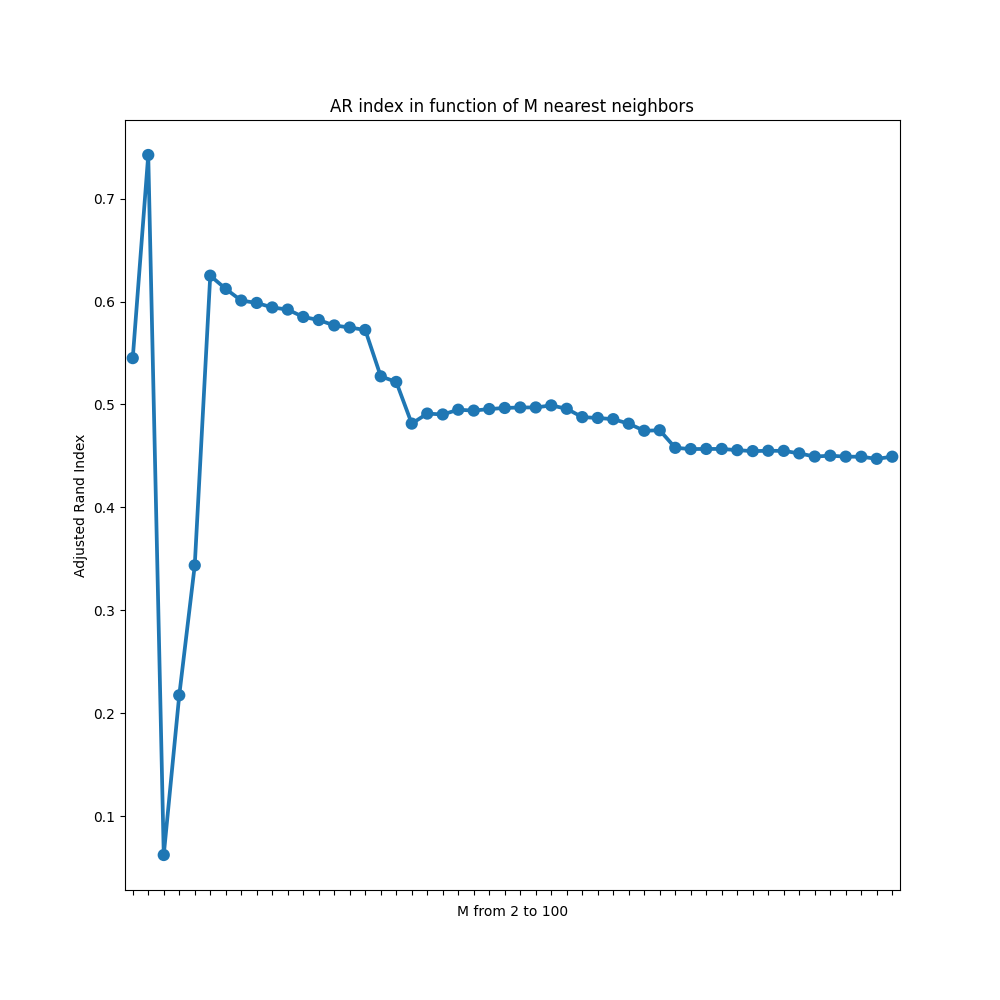

In [94]:
import seaborn as sns


fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10,10)

ax = sns.pointplot(x = ms, y = ars)
ax.set_xlabel("M from 2 to 100")
ax.set_ylabel("Adjusted Rand Index")
ax.set_title("AR index in function of M nearest neighbors")
ax.set_xticklabels("")




# Animation

In [23]:
import pandas as pd
import numpy as np
import matplotlib.image as mpimg
from os import listdir
from os.path import isfile, join
import json
import cv2
import os
import matplotlib.animation as animation
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation







In [33]:
ms2 = np.flip(ms)

array([100.,  98.,  96.,  94.,  92.,  90.,  88.,  86.,  84.,  82.,  80.,
        78.,  76.,  74.,  72.,  70.,  68.,  66.,  64.,  62.,  60.,  58.,
        56.,  54.,  52.,  50.,  48.,  46.,  44.,  42.,  40.,  38.,  36.,
        34.,  32.,  30.,  28.,  26.,  24.,  22.,  20.,  18.,  16.,  14.,
        12.,  10.,   8.,   6.,   4.,   2.])

In [36]:
labels[0]

array([3, 3, 3, ..., 2, 2, 2])

In [45]:
nr = spectralNR(X, n_of_clusters = 3, M=int(m), nodeRepresentationDim=3)

In [48]:
nr[:,1]

array([ 0.03410954,  0.02492836,  0.03450665, ...,  0.03318001,
       -0.01411466,  0.01687534])

In [74]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10,10)

ms2 = np.flip(ms)

# G_to_animate = G
def animate(i):

    ax = fig.add_subplot(111, projection='3d')
    print(i)
    ax.clear()
    
    m =  ms2[i]
#     m = ms[i]# comm
    
    nr = spectralNR(X, n_of_clusters = 3, M=int(m), nodeRepresentationDim=3)
    
    ax.scatter(nr[:,0], nr[:,1], nr[:,2], marker='.', c = labels[0])

    print(np.max(nr))
    print(np.min(nr))

    ax.set_title("Node representation - decreasing M 100 to 2")

    ax.set_xlim([-0.1, 0.1])
    ax.set_ylim([-0.1, 0.1])
    ax.set_zlim([-0.1, 0.1])

    
    
anim = FuncAnimation(fig, animate, frames=50,
                    interval=400, repeat=False)
plt.close()

In [60]:
ms2[49]

2.0

In [75]:
from matplotlib.animation import PillowWriter
# Save the animation as an animated GIF
anim.event_source.stop()
anim.save("node-representation-animation.gif", dpi=300,
         writer=PillowWriter(fps=5))

0
0.06341854433300566
-0.048931422155454075
0
0.06341854433300566
-0.048931422155454075
1
0.06305219377196228
-0.04877890433858709
2
0.048522604900049046
-0.06243558480822159
3
0.062179691421797266
-0.05058760374306313
4
0.047129295922937776
-0.061708133242281325
5
0.046903379425781884
-0.06126848378512843
6
0.052698559348561366
-0.061089934060133466
7
0.06075024190312614
-0.04380943883761739
8
0.060290663155858175
-0.04983071788885449
9
0.050461408613335416
-0.06008084591503062
10
0.05147247167341434
-0.05959481994704752
11
0.05198590284456994
-0.05936913015019047
12
0.05238768705764803
-0.059477713000401736
13
0.052849039510714436
-0.059627182158154345
14
0.053208861172598945
-0.05951126039086425
15
0.059425369933298465
-0.04621013043000619
16
0.053092182966240506
-0.059541709053652206
17
0.05312649484837454
-0.05977968860992408
18
0.04710752730809682
-0.06014229522500817
19
0.052634589218784444
-0.060536281079501764
20
0.047891178999188204
-0.06117545791230735
21
0.05248331240747941

# Initial data representation

In [88]:
%matplotlib widget

(-3.0, 3.0)

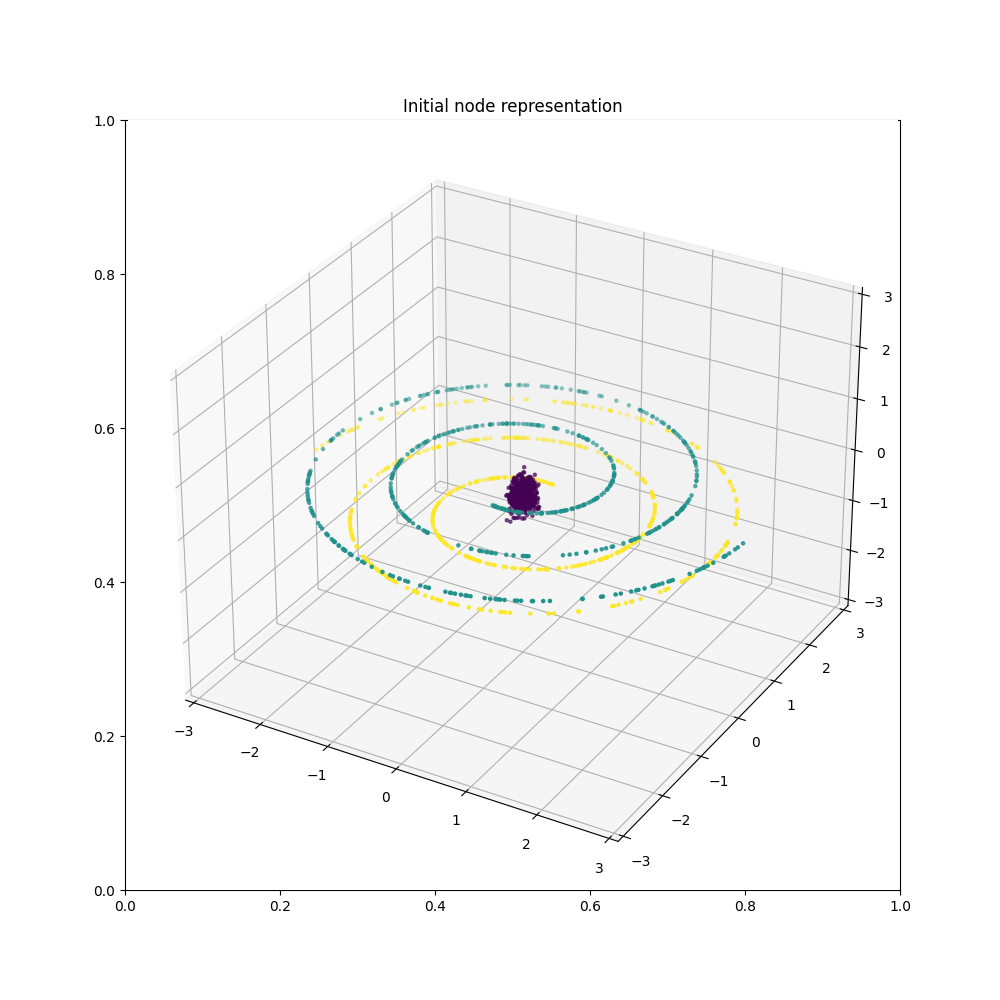

In [98]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10,10)

ms2 = np.flip(ms)



ax = fig.add_subplot(111, projection='3d')
ax.clear()

ax.scatter(X[:,0], X[:,1], X[:,2], marker='.', c = labels[0])

ax.set_title("Initial node representation")

ax.set_xlim([-3, 3])
ax.set_ylim([-3, 3])
ax.set_zlim([-3, 3])

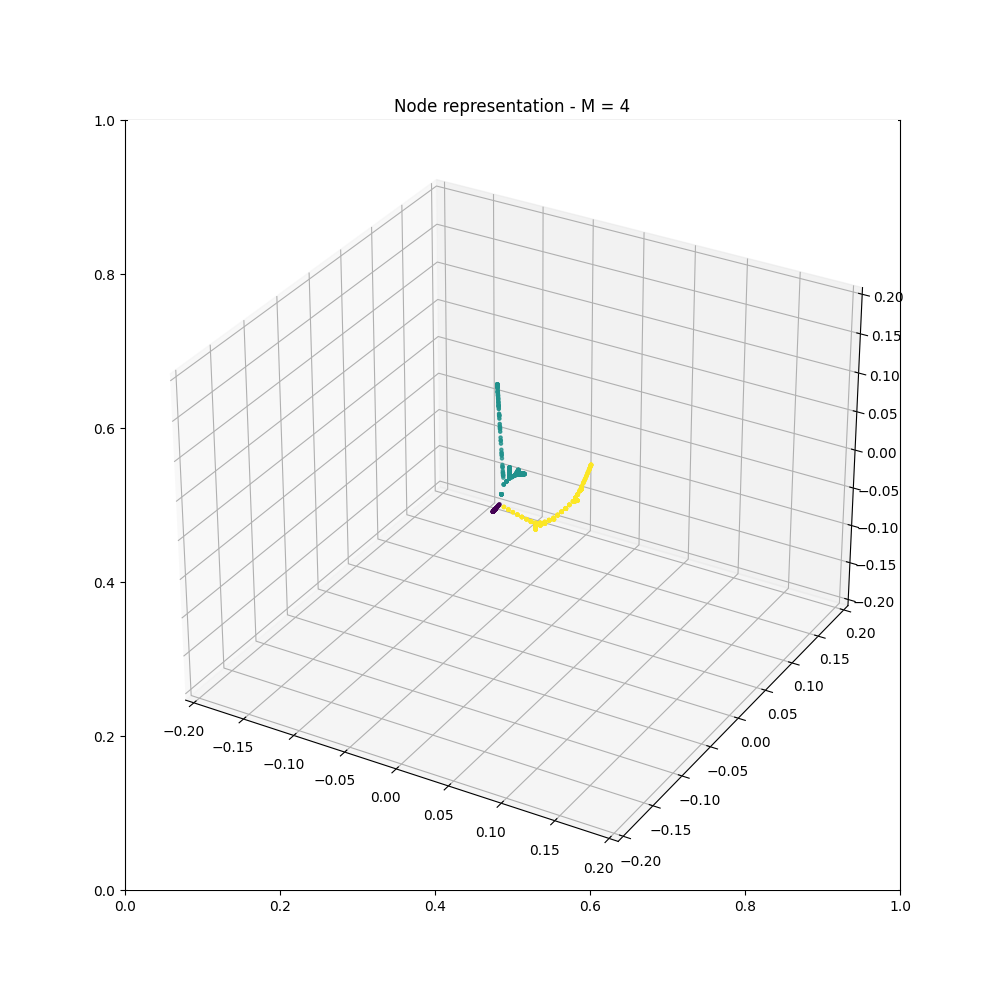

In [95]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10,10)

ax = fig.add_subplot(111, projection='3d')

ax.clear()

m = 4

nr = spectralNR(X, n_of_clusters = 3, M=int(m), nodeRepresentationDim=3)

ax.scatter(nr[:,0], nr[:,1], nr[:,2], marker='.', c = labels[0])


ax.set_title("Node representation - M = 4")

ax.set_xlim([-0.2, 0.2])
ax.set_ylim([-0.2, 0.2])
ax.set_zlim([-0.2, 0.2])

plt.show()

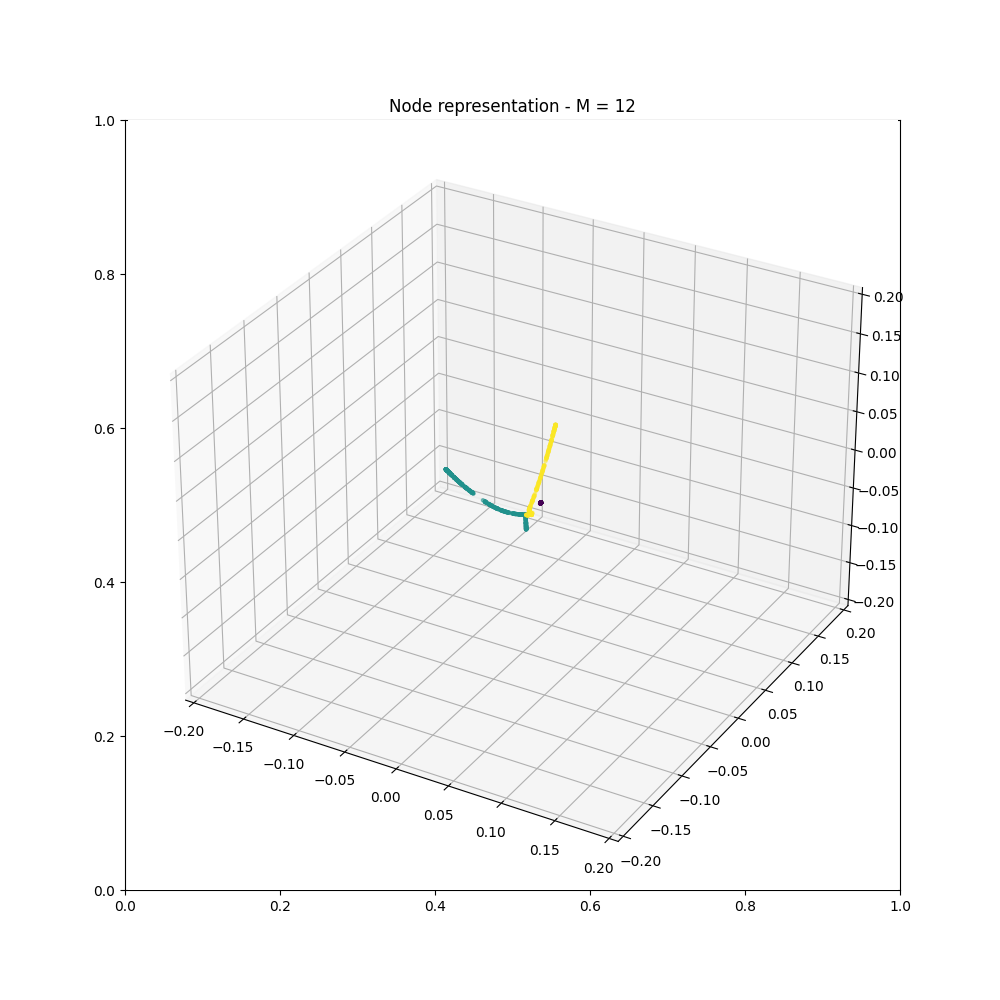

In [96]:
fig, ax = plt.subplots(1, 1)
fig.set_size_inches(10,10,10)

ax = fig.add_subplot(111, projection='3d')

ax.clear()

m = 12

nr = spectralNR(X, n_of_clusters = 3, M=int(m), nodeRepresentationDim=3)

ax.scatter(nr[:,0], nr[:,1], nr[:,2], marker='.', c = labels[0])


ax.set_title("Node representation - M = 12")

ax.set_xlim([-0.2, 0.2])
ax.set_ylim([-0.2, 0.2])
ax.set_zlim([-0.2, 0.2])

plt.show()